Dear Participant,

Please find below the Project for Supervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat (Links to an external site.)Links to an external site.

csv - airline.csvView in a new window

dat file - airq402.datView in a new window

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt (Links to an external site.)Links to an external site.

airq402.txtView in a new window

Assignment Expectations/Steps -

1. Import and store the data in a data frame. (2.5 points)
2. Remove the outliers from the data (5 points)
3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
7. Print the coefficients & intercepts of the linear regression model (5 points)
8. Print the accuracy of the overall model (2.5 points)

Github link: 

Please Note:

Total marks allotted for this assignment is 30.
Assignment final submission should be a URL to your Github repository.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

## 1. Import and store the data in a data frame. (2.5 points)

In [2]:
data = pd.read_csv("airline.csv")

In [3]:
data.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
data.describe(include="all")

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
count,1000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000
unique,90,85,NaN,NaN,NaN,16,NaN,NaN,19,NaN,NaN
top,ATL,TPA,NaN,NaN,NaN,WN,NaN,NaN,WN,NaN,NaN
freq,64,46,NaN,NaN,NaN,257,NaN,NaN,230,NaN,NaN
mean,NaN,NaN,163.37542,1056.973000,672.279140,NaN,60.128590,166.64756,NaN,34.551480,143.193090
std,NaN,NaN,55.36547,643.203251,766.519254,NaN,19.367779,62.66014,NaN,27.096999,47.229184
min,NaN,NaN,50.52000,108.000000,181.410000,NaN,17.680000,50.52000,NaN,1.060000,49.610000
25%,NaN,NaN,125.97500,553.500000,257.197500,NaN,46.510000,124.08500,NaN,13.195000,113.767500
50%,NaN,NaN,161.34500,919.000000,404.780000,NaN,59.240000,161.40000,NaN,26.140000,137.825000
75%,NaN,NaN,197.39250,1452.500000,769.912500,NaN,73.510000,202.97750,NaN,52.972500,168.530000


## 2. Remove the outliers from the data (5 points)

In [5]:
sns.set(style="whitegrid")

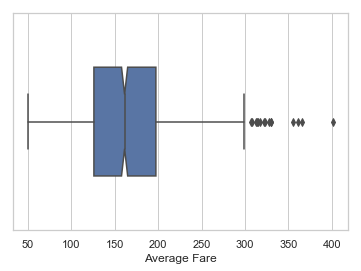

In [6]:
sns.boxplot(x="Average Fare", data=data, notch=True, width = 0.5)
# So there are a few outliers in Average Fare

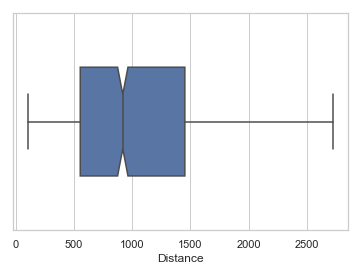

In [7]:
sns.boxplot(x="Distance", data=data, notch=True, width = 0.5)
# There aren't any outliers in Distance

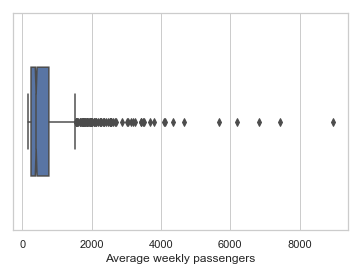

In [8]:
sns.boxplot(x="Average weekly passengers", data=data, notch=True, width = 0.5)
# Quite many outliers

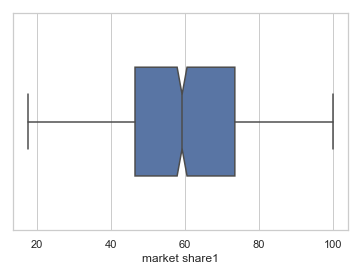

In [9]:
sns.boxplot(x="market share1", data=data, notch=True, width = 0.5)

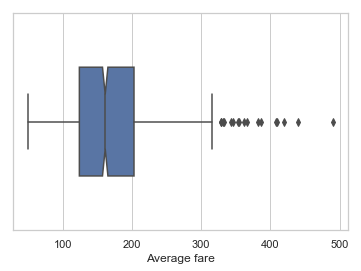

In [10]:
sns.boxplot(x="Average fare", data=data, notch=True, width = 0.5)
# There are a few outliers

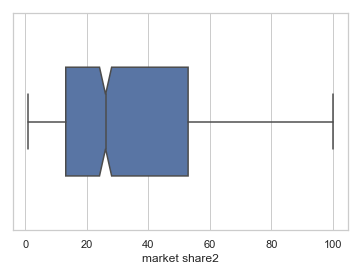

In [11]:
sns.boxplot(x="market share2", data=data, notch=True, width = 0.5)

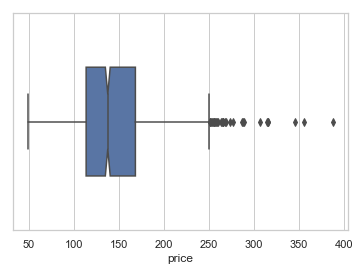

In [12]:
sns.boxplot(x="price", data=data, notch=True, width = 0.5)

In [13]:
# Create a Dataframe only of Quantitative variables
df = data[["Average Fare", "Distance", "Average weekly passengers", "market share1", "Average fare", "market share2", "price"]]

# Compute IQR (Inter Quartile Range) for each column in DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Compute Lower and Upper Whisker for each column in DataFrame
lower_whisk = (Q1 - 1.5 * IQR)
upper_whisk = (Q3 + 1.5 * IQR)

# Only include the rows that are between lower_whisker and upper_whisker. Rest of the rows are filtered out.
df = df[((df >= lower_whisk) & (df <= upper_whisk)).all(axis=1)]
df.describe()

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,160.292068,1039.383051,499.132644,60.636938,162.589051,34.373028,140.431073
std,48.468895,615.224361,327.573566,19.361447,53.288002,27.183305,39.849789
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,50.520000
25%,126.600000,564.000000,249.020000,47.020000,125.590000,13.060000,115.110000
50%,160.710000,914.000000,372.930000,59.750000,160.740000,26.250000,138.020000
75%,194.050000,1381.000000,644.560000,74.660000,198.470000,52.930000,166.260000
max,288.580000,2724.000000,1519.890000,100.000000,315.860000,100.000000,250.020000


## 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [14]:
# Average Fare is index 0
y = df.iloc[:,0]
print(y.head())

# Other columns are from index 1 to index 6
X = df.iloc[:,1:7]
print(X.head())

0    114.47
1    122.47
2    214.42
3     69.40
4    158.13
Name: Average Fare, dtype: float64
   Distance  Average weekly passengers  market share1  Average fare  \
0       528                     424.56          70.19        111.03   
1       860                     276.84          75.10        123.09   
2       852                     215.76          78.89        223.98   
3       288                     606.84          96.97         68.86   
4       723                     313.04          39.79        161.36   

   market share2   price  
0          70.19  111.03  
1          17.23  118.94  
2           2.77  167.12  
3          96.97   68.86  
4          15.34  145.42  


## 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [15]:
print(df.corr()["Average Fare"] > 0.1)
# Distance, Average fare and price have correlation greater than 0.1
X = X.drop(columns=['Average weekly passengers', 'market share1', 'market share2'])
X.head()

Average Fare                  True
Distance                      True
Average weekly passengers    False
market share1                False
Average fare                  True
market share2                False
price                         True
Name: Average Fare, dtype: bool


,Distance,Average fare,price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42


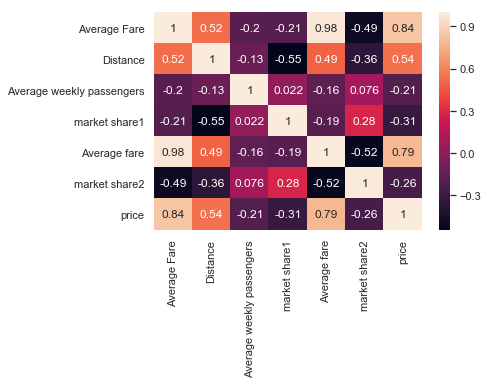

In [16]:
sns.heatmap(df.corr(), annot=True)

## 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

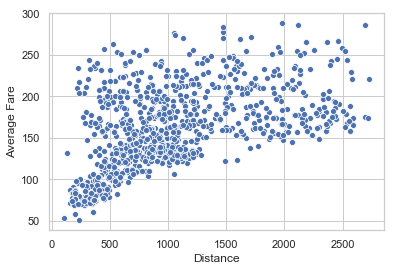

In [17]:
sns.scatterplot(x="Distance", y="Average Fare", data=df)

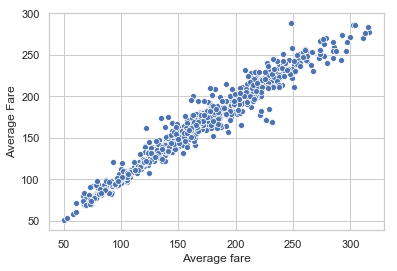

In [18]:
sns.scatterplot(x="Average fare", y="Average Fare", data=df)

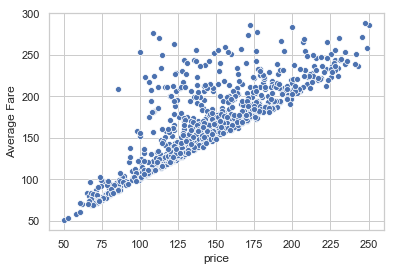

In [19]:
sns.scatterplot(x="price", y="Average Fare", data=df)

## 6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
y_pred = lm.predict(X_test)
#y_pred.reindex(X_test.keys())

y_pred_s = pd.Series(y_pred, index = y_test.keys())

df_actual_predicted = pd.DataFrame()
df_actual_predicted["Actual"] = y_test
df_actual_predicted["Predicted"] = y_pred_s
df_actual_predicted.head()


,Actual,Predicted
47,94.95,92.753721
445,143.91,146.284243
785,205.13,204.966344
717,178.12,177.395860
995,136.16,135.682772


## 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [22]:
print("Intercept = ", lm.intercept_)
print("Coefficients = ", lm.coef_)

Intercept =  7.046674666798538
Coefficients =  [0.00160569 0.75053985 0.21032058]


In [23]:
print("Train Score (R2) = ", lm.score(X_train, y_train))
print("Test  Score (R2) = ", lm.score(X_test, y_test))

Train Score (R2) =  0.9702202052755531
Test  Score (R2) =  0.9721571730396097
